In [18]:
import MDAnalysis as mda
from MDAnalysis.lib import distances
import numpy as np
import matplotlib.pyplot as plt


strc_file = '/media/bhehlen/Expansion/CD16_newDyna/nofuc1/MULTIDIR/2/merged_files/step3_input_no_water_no_ions.pdb'
traj_file = '/media/bhehlen/Expansion/CD16_newDyna/nofuc1/MULTIDIR/2/merged_files/all_aligned_no_water_no_ions.xtc'
# Load your trajectory and topology files
u = mda.Universe(strc_file, traj_file)

In [19]:
# Define a selection for sugars (modify based on your system)
sugar_selection = u.select_atoms("segid CARA or segid CARB or segid CARC")
unique_sugars = set(atom.resname for atom in sugar_selection.atoms)
print("Sugars in selected glycans:")
print(unique_sugars)
print()

# Print information about the selected sugars
print("Atoms in selected Sugars:")
print("segID resName resNum atomNum atomName")
for atom in sugar_selection:
    print(atom.segid, atom.resname, atom.resnum, atom.id, atom.name)

Sugars in selected glycans:
{'AMAN', 'BMAN', 'AFUC', 'BGLC', 'BGAL'}

Atoms in selected Sugars:
segID resName resNum atomNum atomName
CARA BGLC 1 6797 C1
CARA BGLC 1 6798 H1
CARA BGLC 1 6799 C5
CARA BGLC 1 6800 H5
CARA BGLC 1 6801 O5
CARA BGLC 1 6802 C2
CARA BGLC 1 6803 H2
CARA BGLC 1 6804 N
CARA BGLC 1 6805 HN
CARA BGLC 1 6806 C
CARA BGLC 1 6807 O
CARA BGLC 1 6808 CT
CARA BGLC 1 6809 HT1
CARA BGLC 1 6810 HT2
CARA BGLC 1 6811 HT3
CARA BGLC 1 6812 C3
CARA BGLC 1 6813 H3
CARA BGLC 1 6814 O3
CARA BGLC 1 6815 HO3
CARA BGLC 1 6816 C4
CARA BGLC 1 6817 H4
CARA BGLC 1 6818 O4
CARA BGLC 1 6819 C6
CARA BGLC 1 6820 H61
CARA BGLC 1 6821 H62
CARA BGLC 1 6822 O6
CARA BGLC 1 6823 HO6
CARA BGLC 2 6824 C1
CARA BGLC 2 6825 H1
CARA BGLC 2 6826 C5
CARA BGLC 2 6827 H5
CARA BGLC 2 6828 O5
CARA BGLC 2 6829 C2
CARA BGLC 2 6830 H2
CARA BGLC 2 6831 N
CARA BGLC 2 6832 HN
CARA BGLC 2 6833 C
CARA BGLC 2 6834 O
CARA BGLC 2 6835 CT
CARA BGLC 2 6836 HT1
CARA BGLC 2 6837 HT2
CARA BGLC 2 6838 HT3
CARA BGLC 2 6839 C3
CA

In [20]:
strc_file = '/media/bhehlen/Expansion/CD16_newDyna/nofuc1/MULTIDIR/2/merged_files/step3_input_no_water_no_ions.pdb'
traj_file = '/media/bhehlen/Expansion/CD16_newDyna/nofuc1/MULTIDIR/2/merged_files/all_aligned_no_water_no_ions.xtc'

# Load your trajectory and topology files
u = mda.Universe(strc_file, traj_file)

# Print the unique segids and residue names to identify sugars
unique_segids = set(atom.segid for atom in u.atoms)
unique_residues = set(atom.resname for atom in u.atoms)
print("Unique SegIDs:", unique_segids)
print("Unique Residues:", unique_residues)


Unique SegIDs: {'CARB', 'PROC', 'CARD', 'CARA', 'CARC', 'PROB', 'PROA'}
Unique Residues: {'ALA', 'CYS', 'GLN', 'LYS', 'LEU', 'THR', 'ASN', 'AFUC', 'MET', 'ARG', 'TRP', 'GLU', 'PHE', 'BGAL', 'SER', 'AMAN', 'BMAN', 'GLY', 'ASP', 'PRO', 'BGLC', 'TYR', 'VAL', 'ILE', 'HIS'}


In [38]:
# Define two atom selections
#selection1 = u.select_atoms("segid CARA and resnum 1 and name O6")
selection1 = u.select_atoms("segid PROB and resname ASP and resid 239")
#selection1 = u.select_atoms("segid PROB")


#selection2 = u.select_atoms("segid CARC and resnum 4 and name HO6")
selection2 = u.select_atoms("segid PROC and resname LYS and resid 138")
#selection2 = u.select_atoms("segid PROC")


# Calculate the center of mass for each frame  (or type 'compound='residues')
com_selection1 = np.array([selection1.center_of_mass(compound='group') for ts in u.trajectory])
com_selection2 = np.array([selection2.center_of_mass(compound='group') for ts in u.trajectory])

#print(np.shape(com_selection1))

# Reshape the arrays for the distance calculation
com_selection1_reshaped = com_selection1.reshape((len(com_selection1), 3))
com_selection2_reshaped = com_selection2.reshape((len(com_selection2), 3))


# Calculate distances between centers of mass for each frame
distances_array = mda.lib.distances.distance_array(com_selection1_reshaped, com_selection2_reshaped, \
                                                   box=u.dimensions)

# Calculate the distnace between the two selected elements
distances=np.diag(distances_array)

# Print the average distances
average_distance = np.mean(distances_array, axis=1)
print("average distance :",average_distance)

#for frame, avg_distance in enumerate(average_distances):
#    print(f"Frame {frame + 1}: Average Distance = {avg_distance:.3f} Å")

[18.02720173 18.50016354 18.23202683]


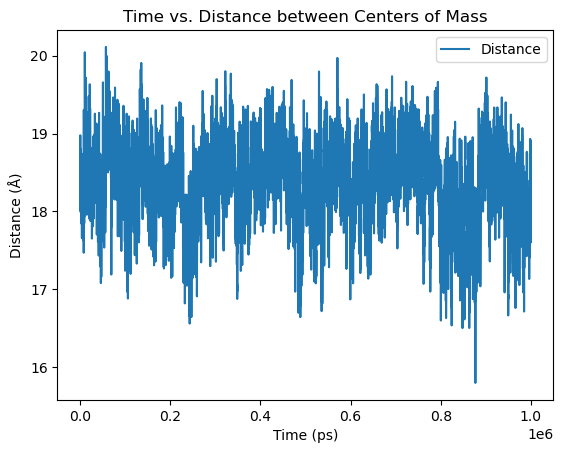

In [39]:
# Plot the distances as a function of time
time_values = [ts.time for ts in u.trajectory]
np.savetxt('data/distance.dat', distances)
plt.plot(time_values, distances, label="Distance")
plt.xlabel("Time (ps)")
plt.ylabel("Distance (Å)")
plt.title("Time vs. Distance between Centers of Mass")
plt.legend()
plt.show()
